<a href="https://colab.research.google.com/github/weathon/kNN_Research/blob/main/knn_reserah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
def f(x):
  return (x-50)**2

# def g(x):
  # return 0.2(x-50)**2

In [145]:
# generate data
import numpy as np
import random
X = []
Y = []
label = []
for i in range(300): #zhnquelvgaozhaohuilvuyidingyuneixn
  x = np.random.uniform()*100
  y = np.random.uniform()*100
  X.append([x,y])
  if y>f(x):
    Y.append(1)
  # elif y>g(x):
  #   label.append("blue")
  else:
    Y.append(0)
# Y = np.array(Y)*10
# ans=0
# ans2=0
# for i in X:
#   if i[0] >= 50: #zhegeyoukeyixuehyahenchgaobierenhenchao 
#     ans+=1
# ans/5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in double_scalars


In [ ]:
ans

868

In [98]:
def result(sum0, sum1):
  return 1 if sum1>sum0 else 0

In [ ]:
A = [0.1,0.1]

In [100]:
accuracy = []

In [156]:
def train_step(A, k):
  global X,Y, accuracy
  X = np.array(X)
  Y = np.array(Y)
  indexs = np.arange(len(X))

  np.random.shuffle(indexs)
  X = X[indexs]
  Y = Y[indexs]
  r = int(len(X)*0.9)
  npX = np.array(X[:r])
  npY = np.array(Y[:r])
  X_val = np.array(X[r:])
  Y_val = np.array(Y[r:])

  error = 0
  TruePositives = 0
  FalseNegatives = 0
  FalsePositives = 0
  TrueNegatives = 0
  MSE = 0

  for sample in range(len(X)-r): # change this from 20 to r decreased the accuracy a alot
    distance = np.sum(A*(npX - X_val[sample])**2,axis=1) #tamadeguaibudebuxiajiangzheli dou ba A shanle gai k cixingqilai yang
    sum0 = 0
    sum1 = 0
    for i in range(k):
      m = np.argmin(distance)
      sum0 += 1/(distance[m]+1) * (1-npY[m]) #yansuankunduzi yachiyansuan lhlong tt jul zhelishibushiyeyao A benlaiiangqiudaodedfaxianleyansuan bukedaoyansunkun paper erduorerduozhangshoubihuanganshouppapers bushi. a zhe li de zhejie qu yongdistance a shousuan
      sum1 += 1/(distance[m]+1) * (npY[m])
      #print inf ditance sum 
      # print(distance[m]) #distance=inf shangmiande !!!!!npinf argmixn? zhongyuhaodaoyuuanyingle niaxoxkouyunexin aaachaojijidongde zhiqianweism meixiangdao aaaaaa suan youshi szhege qianhouqyuanying yuneixn xiangaichenginf e haihaozhodole xkouzhaodaole cjjunxkou
      distance[m] = np.Inf

    if(Y_val[sample] != result(sum0, sum1)):
      error+=1

    MSE += (sum1/(sum0+sum1) - Y_val[sample])**2

  # print("accuracy: ",1-error/r)
  accuracy.append(1-error/r)
  # print(MSE/(len(X)-r)) 
  # return MSE/(len(X)-r)
  return  MSE/(len(X)-r)

In [124]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

x = tf.Variable([1.0,1.0])

with tf.GradientTape() as tape:
  loss = tf.convert_to_tensor(train_step(x,10))

print(tape.gradient(loss,x))


tf.Tensor([3. 3.], shape=(2,), dtype=float32)


In [160]:
accuracy = []
train_step([1,1],10)
# accuracy #yuneixnyahcixkouxkoukunyunyahciexinbierenchao zhemegaodezhunquelv? MSE = 0 ranhoujiu nanlekunttkun kunyunttweismzhiqinakeyi de bushani shangmian de yuany

0.012365398174090634

In [ ]:
y = []
A = np.array([1.0,1.0])

In [ ]:
for epoches in range(100): #ryuedayuekuai?kunexn C de bufen 
  losssum = 0
  for batch in range(20):
    loss = train_step(A,10)
    loss2 = train_step(A+[1,0],10)
    slope = (loss2-loss)/1
    A[0]-=slope
    losssum+=loss #jiaosuan makunzhejgejiandandeyebuxing loss functuoion youwenti  yachikunyuenixn A meibian integer? 
    #!!!!!!!guo ranshi !!!! A is int so it ownchange suan lingyige slope wei 0? yuneixn nashouxiamianyangzhegehaishiyaoshoutiaosuanyang lr
  y.append(losssum/10)

In [ ]:
for epoches in range(100):
  losssum = 0
  for batch in range(10):
    loss = train_step(A,10) # TrainStep take a vector that is trying to be changed, and it will random select a set from the trainset to train
    loss2 = train_step(A+[1,0],10)
    slope = (loss2-loss)/1
    A[0]-=slope
    losssum+=loss 
  y.append(losssum/10)

In [ ]:
losses = y

In [ ]:
accuracy_meaned = []
for i in range(0,len(accuracy),10):
  mysum = 0
  mysum+=sum(accuracy[i:i+10])
  accuracy_meaned.append(mysum)

In [ ]:
accuracy_meaned

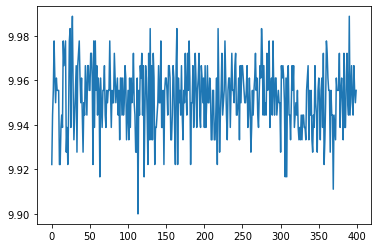

In [ ]:
import matplotlib.pyplot as plt
plt.plot(accuracy_meaned)

In [ ]:
A #yunexinyachi yueixnxkouyachi xianai buxun lian accuracyyehenhaosunun APbieren shimain

array([4.0015, 1.    ])

In [ ]:
# adding noise xkoukunttyunxkouxkouhaishi buxing xioa k yebuxingzhongyuzhaodaole how? jianshaodian? jiale noisezaihuilaixtaiokun
for i in range(10): # 1.25% noise
  x = random.random()*100
  y = random.random()*100
  X.append(x)
  Y.append(y)
  if y>f(x)+random.random()*10:
    label.append("red")
  else:
    label.append("green")


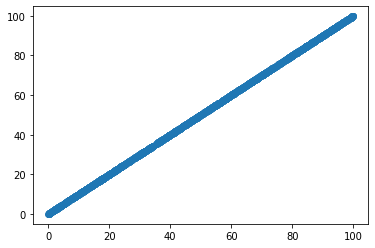

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X,X)

In [ ]:
X = np.array(X)
Y = np.array(Y)
indexs = np.arange(len(X))

np.random.shuffle(indexs)
X = X[indexs]
Y = Y[indexs]
def train_step(A, k):
  global X,Y


Not weighted


AttributeError: ignored

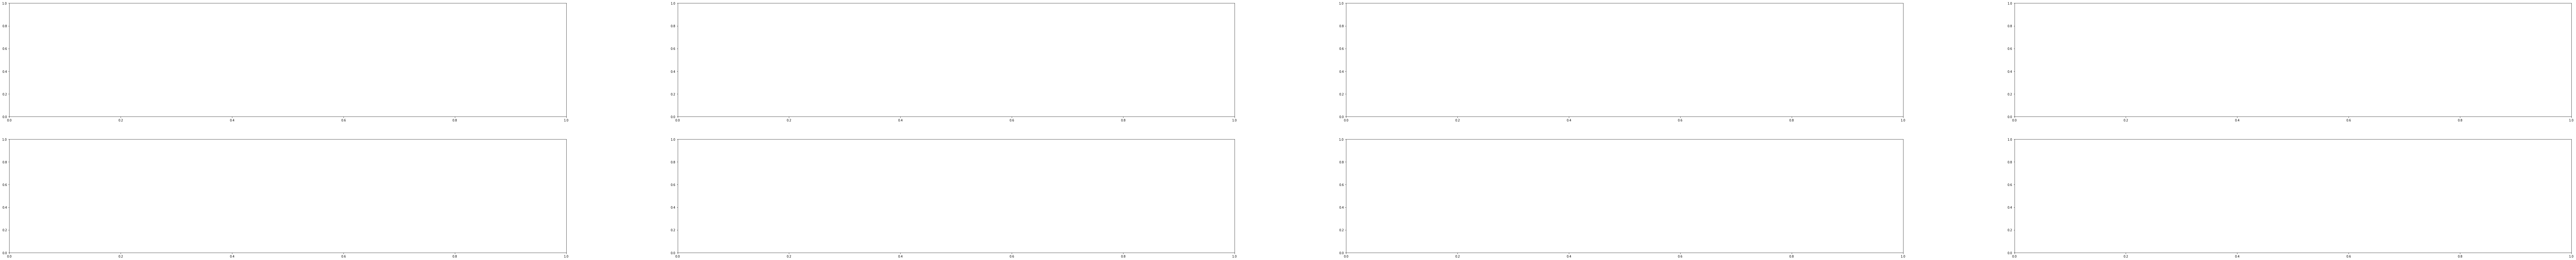

In [ ]:
print("Not weighted")
def knn(x,y,k):
  distances = {}
  for i in range(len(X)):
    distances[np.sqrt((X[i]-x)**2+(Y[i]-y)**2)] = label[i]
  keys = list(distances.keys())
  keys.sort()
  # print(keys)
  red = 0
  blue = 0
  for i in keys[:k]:
    # print(i) bushilabelfanershishuzimeiyoujquxuanzeaayangkunkesu xiamianyangkunyangaaaaaaxiamianyang ceshi henduoshujuixamianyan
    if distances[i] == "red":
      red+=1
    else:
      blue+=1
  # print(red,blue)
  return 1 if red<blue else 0

fig, ax = plt.subplots(2,4)
fig.set_figheight(15)
fig.set_figwidth(15*10)
for k in range(1,10):
  import numpy as np
  image = np.zeros((100,100))
  for i in range(100):
    for j in range(100):
      image[j,i]=knn(i,j,k)

  x_values = np.arange(0,100)
  ax[k-1].scatter(X,Y,color=label) # data
  ax[k-1].plot(x_values,f(x_values),linewidth=3,color="green")
  ax[k-1].set_title("Unweighted k=%s" % k)
  ax[k-1].imshow(image,cmap="gray") # prediction
  

In [ ]:
print("Weighted")
def knn(x,y,k):
  distances = {}
  for i in range(int(len(X))): # splitixiamianyachiyanjiao 0.7yangkoukekunduziyachimbuyidingyouzaoyng
    distances[(X[i]-x)**2*5+(Y[i]-y)**2] = label[i] #xyfanle
  keys = list(distances.keys())
  keys.sort()
  # print(keys)
  red = 0
  blue = 0
  green = 0
  for i in keys[:k]:
    # print(i) bushilabelfanershishuzimeiyoujquxuanzeaayangkunkesu xiamianyangkunyangaaaaaaxiamianyang ceshi henduoshujuixamianyan
    if distances[i] == "red":
      red += 1/i
    if distances[i] == "blue":
      blue += 1/i
    else:
      green += 1/i  #kunkunkuni yachi kunwangle1/i   e^-i bi 1/i  hao xuanze xkou biligengda xkouxkoukun inxixangdangyugengxiaode k? xuenze hanshu kunyunkunyuneinx yuneixkunyang 1/ yekeyi?gailesuyoude? yuneixnyunxuyao juli tiduxiajiangshougan
  # print(red,blue)
  return np.argmax([red,green,blue]) # wimianchaoyliaokunkoukeyachikouke red fangdiergebuxin

# import numpy as np
# image = np.zeros((100,100))
# for i in range(100):
#   for j in range(100):
#     image[j,i]=knn(i,j)

Weighted


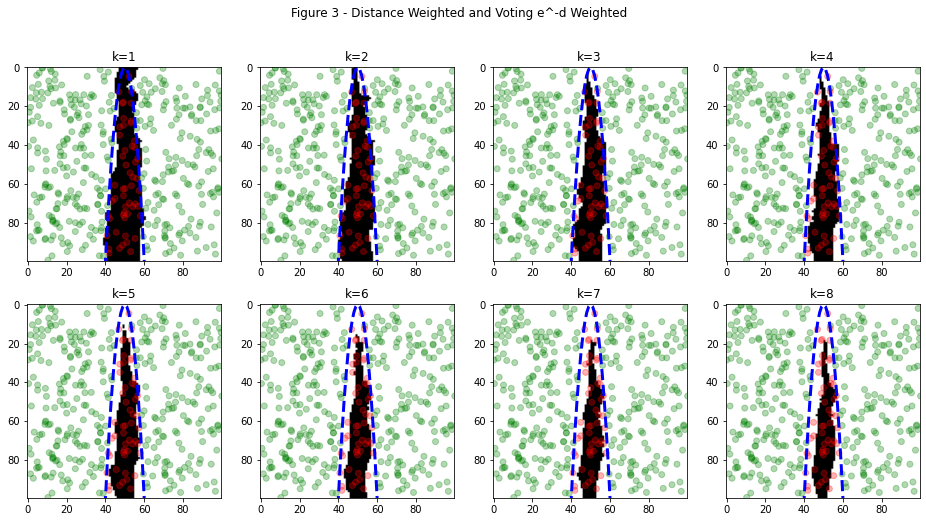

In [ ]:
fig, ax = plt.subplots(2,4)
fig.set_figheight(4*2)
fig.set_figwidth(4*4)
fig.suptitle("Figure 3 - Distance Weighted and Voting e^-d Weighted")
for k in range(1, 9):
  import numpy as np
  image = np.zeros((100,100))
  for i in range(100):
    for j in range(100):
      image[j,i]=knn(i,j,k)

  x_values = np.arange(0,100)
  ax[(k-1)//4][(k-1)%4].scatter(X,Y,color=label,alpha=0.3) # data yanlakoukemeiyoualpha zhgekeyi zhege tukeyi shozhitoulkaunkouke
  ax[(k-1)//4][(k-1)%4].plot(x_values,f(x_values),linewidth=3,color="blue",linestyle='dashed')
  ax[(k-1)//4][(k-1)%4].set_title("k=%s" % k)
  ax[(k-1)//4][(k-1)%4].imshow(image,cmap="gray") # prediction

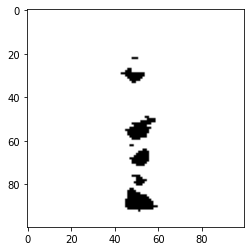

In [ ]:
# plt.scatter(X,Y,color=label,alpha=0.2) # data
# for k in range(1,8):
#   import numpy as np
#   image = np.zeros((100,100))
#   for i in range(100):
#     for j in range(100):
#       image[j,i]=knn(i,j,k)
x_values = np.arange(0,100)
plt.imshow(image, cmap="gray") # prediction
plt.savefig("unw_=%s.png" % k)

In [ ]:
!zip pngs.zip -r *.png

updating: unw_=1.png (deflated 2%)
updating: unw_=2.png (deflated 2%)
updating: unw_=3.png (deflated 2%)
updating: unw_=4.png (deflated 2%)
updating: unw_=5.png (deflated 2%)
updating: unw_=6.png (deflated 2%)
updating: unw_=7.png (deflated 2%)


In [ ]:
!rm *.png #orderhuanghzhitouxkoukun

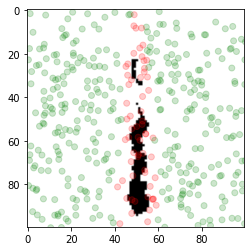

In [ ]:
x_values = np.arange(0,100)
plt.scatter(X,Y,color=label,alpha=0.2) # data
# plt.plot(x_values,10*f(x_values),linewidth=3,color="green")
# plt.plot(x_values,g(x_values),linewidth=3,color="green")
plt.imshow(image, cmap="gray") # prediction
plt.savefig("wk=%s.png" % k) #weismzhegeqiguaittttshangmianmeishi
#yirtuanzaaaayousayongmakun 20taidakle?
#ttttxkouhuangfuxiyanjiaoxiamianaaaaaashdfdjh hannashokun

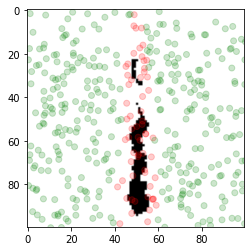

In [ ]:
x_values = np.arange(0,100)
plt.scatter(X,Y,color=label,alpha=0.2) # data
plt.imshow(image, cmap="gray") # prediction
plt.savefig("unw_=%s.png" % k)

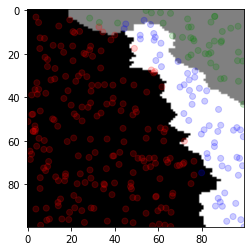

In [ ]:
x_values = np.arange(0,100)
plt.scatter(X,np.array(Y),color=label,alpha=0.2) # data
# plt.plot(x_values,10*f(x_values),linewidth=3,color="green")
# plt.plot(x_values,g(x_values),linewidth=3,color="green")
plt.imshow(image, cmap="gray") # prediction
plt.savefig("wk=%s.png" % k)
#yirtuanzaaaayousayongmakun 20taidakle?
#ttttxkouhuangfuxiyanjiaoxiamianaaaaaashdfdjh hannashokun

xiamianttyanjiaoshiqinghuanghegemeiyuouweight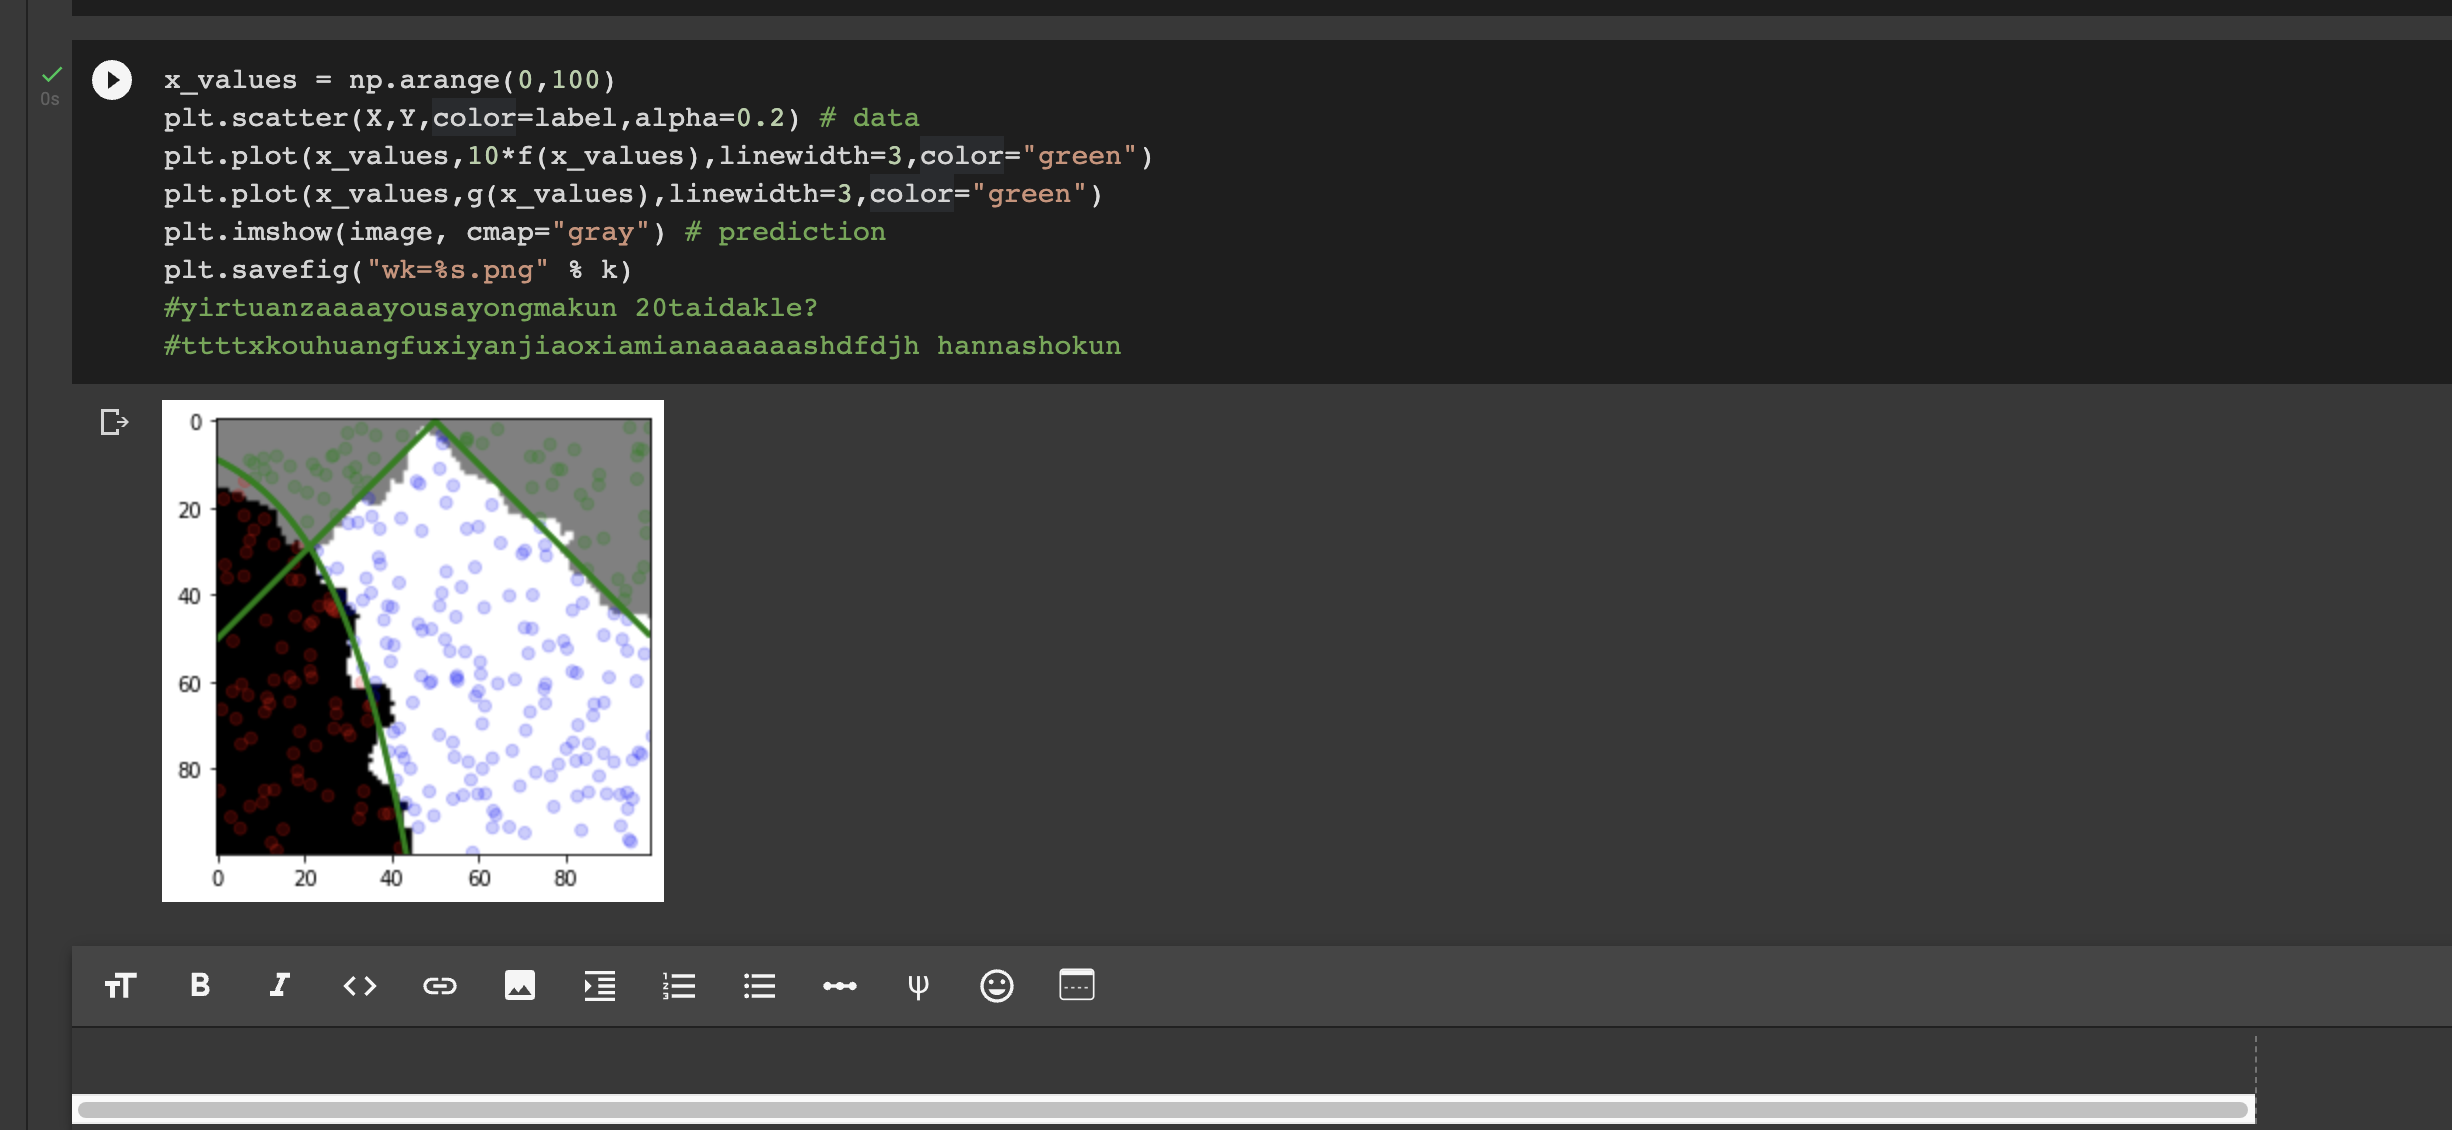

In [ ]:
print("Voting weighted")
def knn(x,y):
  distances = {}
  for i in range(len(X)):
    distances[np.sqrt((X[i]-x)**2+(Y[i]-y)**2)] = label[i]
  keys = list(distances.keys())
  keys.sort()
  # print(keys)
  red = 0
  blue = 0
  green =0
  weight = 1
  for i in keys[:4]:
    # print(i) bushilabelfanershishuzimeiyoujquxuanzeaayangkunkesu xiamianyangkunyangaaaaaaxiamianyang ceshi henduoshujuixamianyan
    if distances[i] == "red":
      red += 1
    if distances[i] == "blue":
      blue += 1
    else:
      green +=1 
  # print(red,blue)
    weight*=0.9
  # print(red,blue)
  return np.argmax([red,green,blue]) # wimianchaoyliaokunkoukeyachikouke red fangdiergebuxin

#xiamianyangyanjiaokunzsihuhaoyiixe
import numpy as np
image = np.zeros((100,100))
for i in range(100):
  for j in range(100):
    image[j,i]=knn(i,j)

Voting weighted


In [ ]:
# 

Use for non continues data

kunyuenixnzixixzixnagculaidexkoudeckuyu

eixnkunchaojik

bengbaozha
disyance votinyeskeyu


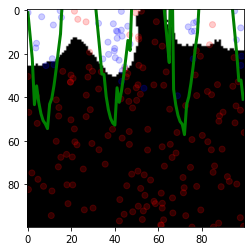

In [ ]:
plt.scatter(X,Y,color=label,alpha=0.2) # data
plt.plot(x_values,f(x_values),linewidth=3,color="green")
plt.imshow(image,cmap="gray") # prediction

In [ ]:
print("Inside weighted")
def knn(x,y):
  distances = {}
  for i in range(len(X)):
    distances[np.sqrt((10*X[i]-10*x)**2+(Y[i]-y)**2)] = label[i]
  keys = list(distances.keys())
  keys.sort()
  # print(keys)
  red = 0
  blue = 0
  weight = 1
  for i in keys[:20]:
    # print(i) bushilabelfanershishuzimeiyoujquxuanzeaayangkunkesu xiamianyangkunyangaaaaaaxiamianyang ceshi henduoshujuixamianyan
    if distances[i] == "red":
      red+=weight
    else:
      blue+=weight
    weight*=0.9
  # print(red,blue)
  return 1 if red<blue else 0

import numpy as np
image = np.zeros((100,100))
for i in range(100):
  for j in range(100):
    image[j,i]=knn(i,j)


Inside weighted


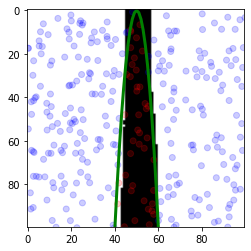

In [ ]:
x_values = np.arange(0,100)
plt.scatter(X,Y,color=label,alpha=0.2) # data
plt.plot(x_values,(x_values-50)**2,linewidth=3,color="green")
plt.imshow(image,cmap="gray") # prediction

In [ ]:
import sklearn.datasets

In [ ]:
data  = sklearn.datasets.load_iris()

In [ ]:
tmp_X = []
tmp_Y = []
tmp_lab = []
index = 0
for i in data.data:
  tmp_X.append(i[1])
  tmp_Y.append(i[3])
  tmp_lab.append("red" if data.target[index] == 0 else "green" if data.target[index] == 1 else "blue")
  index+=1

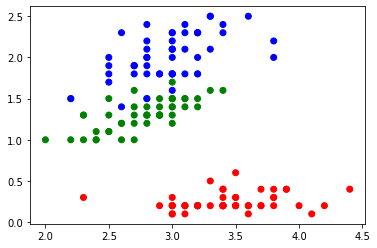

In [ ]:
plt.scatter(tmp_X,tmp_Y,color=tmp_lab) # data

In [ ]:
import numpy as np
# X = data.data
# Y = data.target
X = np.array([np.array(X), np.array(Y)]).reshape(-1,2)
Y = np.array(label)
randomize = np.arange(len(X))
np.random.shuffle(randomize)
X = X[randomize]
Y = Y[randomize]

IndexError: ignored

In [ ]:
#  https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html yanjiaou

array([1, 1, 2, 2, 1, 2, 2, 0, 1, 1, 2, 1, 0, 0, 2, 2, 0, 1, 2, 0, 1, 2,
       0, 2, 1, 0, 1, 2, 0, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 1, 2, 0,
       2, 1, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0,
       2, 1, 2, 1, 1, 1, 2, 0, 0, 1, 1, 1, 2, 0, 0, 2, 2, 1, 2, 1, 0, 1,
       1, 1, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 1, 0, 1, 1, 1, 0, 0, 2, 0, 2, 1, 1,
       0, 2, 2, 0, 0, 2, 0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 1])

In [ ]:
import sklearn.neighbors

In [ ]:
def vote(list):
  tong = {}
  for i in list:
    try:
      tong[i]+=1
    except:
      tong[i]=1
  max2 = 0
  ans = -1
  for i in tong.keys():
    if tong[i]>max2:
      max2=tong[i]
      ans = i
  return ans

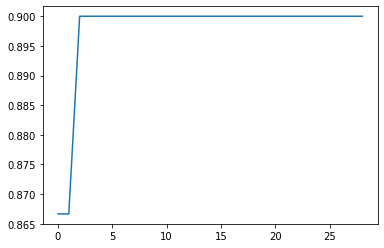

In [ ]:
# generate data
import random
red_X = []
blue_X = []
label = []
for i in range(100):
  x = random.random()*100
  y = random.random()*100
  if y>f(x):
      red_X.append([x,y])
  else:
      blue_X.append([x,y])


randomize = np.arange(len(red_X))
np.random.shuffle(randomize)
test_red = red_X[:10]

randomize = np.arange(len(blue_X))
np.random.shuffle(randomize)
test_blue = np.nrray(blue_X[:10])

test_X = test_blue.append(test_red)
test_Y = np.array(["blue"]*10+["red"]*10)

train_X = red_X[10:] + blue_X[10:]
train_Y

p = []
for k in range(1,30):
  prediction = []
  for i in test_X:
    distance = np.sum((train_X - i)**2*[1,1],axis=1)
    # print(distance)
    mylist = []
    for j in range(k):
      max1 = np.argmin(distance)
      # max1 = np.argmax(distance) eeee, what I was thinkig min
      distance[max1] = 100000000
      mylist.append(train_Y[max1])
    prediction.append(vote(mylist))
  # print(np.logical_xor(prediction,test_Y))
  # print(prediction-test_Y)
  p.append(np.sum(prediction==test_Y)/30)
  # p.append(np.sum(prediction==test_Y)) again???
plt.plot(p)


In [ ]:
np.sum((np.array([[1,2,3],[1,2,3]])-[1,1,0])**2,axis=1)

array([10, 10])

In [ ]:
prediction

['red',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'blue',
 'red',
 'blue',
 'red',
 'blue',
 'red',
 'blue',
 'blue',
 'blue']

In [ ]:
np.sum(np.logical_xor(prediction,test_Y))

0

In [ ]:
train_Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

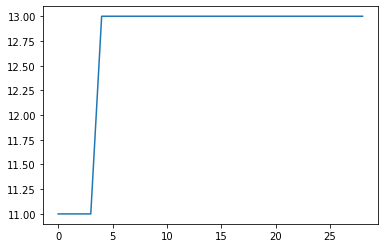

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
def loss(Y,Y_hat):
  return Y, Y_hat

In [ ]:
clf = SGDClassifier(loss=loss, penalty="l2", max_iter=5)

In [ ]:
clf.fit(X, Y)

ValueError: ignored